# The Visualization of the Progress of the Philippines' Sustainable Development Goals (SDGs)

# Requirements and Imports
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

## Libraries
Several libraries are required to perform a thorough analysis of the dataset. Each of these libraries will be imported and described below:
* `pandas` contains a large collection of mathematical functions
* `numpy` contains functions that are designed for data manipulation and data analysis
* `geopandas` contains functionalities that make operations easier on spatial database 
* `matplotlib.pyplot` contains functions to create interactive plots
* `shapely.geometry` contain functions that allow the modification and inspection of geometric objections.

In [132]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import plotly.express as px


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Creating Philippine National and Regional Geospatial Data

## Importing GADM Provincial Data

In [133]:
gadm = gpd.read_file('data/gadm41/gadm41_PHL_1.shp')
print(gadm.shape)
gadm.head()

(81, 12)


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"POLYGON ((120.74773 17.15755, 120.73747 17.156..."
1,PHL.2_1,PHL,Philippines,Agusan del Norte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"POLYGON ((125.51141 8.70021, 125.49689 8.70089..."
2,PHL.3_1,PHL,Philippines,Agusan del Sur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"POLYGON ((126.05209 7.93625, 126.04572 7.93504..."
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.28702 11.74581, 122.28805 ..."
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02776, 123.44541 ..."


In [134]:
gadm.NAME_1

0                    Abra
1        Agusan del Norte
2          Agusan del Sur
3                   Aklan
4                   Albay
             ...         
76              Tawi-Tawi
77               Zambales
78    Zamboanga del Norte
79      Zamboanga del Sur
80      Zamboanga Sibugay
Name: NAME_1, Length: 81, dtype: object

## Importing a Dataset with Philippine Provinces with their Region data

In [135]:
region_prov = pd.read_csv('data/prov_region.csv')
region_prov.head()

,province,capital,region
0,Abra,Bangued,CAR
1,Agusan del Norte,Cabadbaran,Region XIII
2,Agusan del Sur,Prosperidad,Region XIII
3,Aklan,Kalibo,Region VI
4,Albay,Legazpi,Region V


## Merging the GADM and Province-Region Data

In [136]:
gadm_region = gadm.merge(region_prov, left_on='NAME_1', right_on='province', how='left')
gadm_region.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"POLYGON ((120.74773 17.15755, 120.73747 17.156...",Abra,Bangued,CAR
1,PHL.2_1,PHL,Philippines,Agusan del Norte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"POLYGON ((125.51141 8.70021, 125.49689 8.70089...",Agusan del Norte,Cabadbaran,Region XIII
2,PHL.3_1,PHL,Philippines,Agusan del Sur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"POLYGON ((126.05209 7.93625, 126.04572 7.93504...",Agusan del Sur,Prosperidad,Region XIII
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...",Aklan,Kalibo,Region VI
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...",Albay,Legazpi,Region V


## Data Cleaning the Merged datasets

### Checking for null values in Region column

In [137]:
# Checking the unique values under the region column
gadm_region.region.unique()

array(['CAR', 'Region XIII', 'Region VI', 'Region V', 'Region III',
       'BARMM', 'Region II', 'Region IV-A', 'Region VIII', 'Region VII',
       'Region X', nan, 'Region XI', 'Region I', 'Region IV-B',
       'Region XII', 'Region IX'], dtype=object)

In [138]:
# Checking the rows with nan values in region column
gadm_region[gadm_region['region'].isna()]

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",NaN,NaN,NaN
43,PHL.44_1,PHL,Philippines,Maguindanao,NA,NA,Lalawigan,Province,1538,PH.MG,PH-MAG,"MULTIPOLYGON (((124.35421 6.72364, 124.28252 6...",NaN,NaN,NaN
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",NaN,NaN,NaN
52,PHL.53_1,PHL,Philippines,North Cotabato,NA,NA,Lalawigan,Province,1247,PH.NC,NA,"POLYGON ((124.97336 6.73641, 124.97292 6.73792...",NaN,NaN,NaN


As seen from the output, four provinces have NaN values in their region column.

#### Finding the region for North Cotabato

In [139]:
# Search if there is nSouth Cotabato and copy its region value
gadm_region[gadm_region['NAME_1'] == 'South Cotabato']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
69,PHL.70_1,PHL,Philippines,South Cotabato,NA,NA,Lalawigan,Province,1263,PH.SC,PH-SCO,"POLYGON ((125.23561 6.12256, 125.23441 6.11934...",South Cotabato,Koronadal,Region XII


In [140]:
gadm_region.loc[gadm_region['NAME_1'] == 'North Cotabato','region'] = 'Region XII'
gadm_region[gadm_region['NAME_1'] == 'North Cotabato'].region

52    Region XII
Name: region, dtype: object

In [141]:
gadm_region.loc[gadm_region['NAME_1'] == 'North Cotabato',['province', 'capital']] = 'North Cotabato', 'Kidapawan'
gadm_region[gadm_region['NAME_1'] == 'North Cotabato']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
52,PHL.53_1,PHL,Philippines,North Cotabato,NA,NA,Lalawigan,Province,1247,PH.NC,NA,"POLYGON ((124.97336 6.73641, 124.97292 6.73792...",North Cotabato,Kidapawan,Region XII


#### Finding the region for Compostela Valley

In [142]:
# Check if there is Davao de Oro in the data. If none, we can replace its region value to Region XI given that Compostela Valley or Davao de Oro is part of the Davao region.
gadm_region[gadm_region['region'] == 'Region XI']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
26,PHL.27_1,PHL,Philippines,Davao del Norte,Davao,NA,Lalawigan,Province,1123,PH.DV,PH-DAV,"MULTIPOLYGON (((125.72403 6.91986, 125.72347 6...",Davao del Norte,Tagum,Region XI
27,PHL.28_1,PHL,Philippines,Davao del Sur,NA,NA,Lalawigan,Province,1124,PH.DS,PH-DAS,"MULTIPOLYGON (((125.48917 5.42806, 125.48917 5...",Davao del Sur,Digos,Region XI
28,PHL.29_1,PHL,Philippines,Davao Oriental,NA,NA,Lalawigan,Province,1125,PH.DO,PH-DAO,"MULTIPOLYGON (((126.19121 6.27074, 126.19085 6...",Davao Oriental,Mati,Region XI


In [143]:
gadm_region.loc[gadm_region['NAME_1'] == 'Compostela Valley','region'] = 'Region XI'
gadm_region[gadm_region['NAME_1'] == 'Compostela Valley']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",NaN,NaN,Region XI


In [144]:
gadm_region.loc[gadm_region['NAME_1'] == 'Compostela Valley',['province', 'capital']] = 'Compostela Valley', 'Nabunturan'
gadm_region[gadm_region['NAME_1'] == 'Compostela Valley']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",Compostela Valley,Nabunturan,Region XI


#### Finding the region for Maguindanao

In [145]:
# Maguindanao is in BARMM
gadm_region.loc[gadm_region['NAME_1'] == 'Maguindanao','region'] = 'BARMM'
gadm_region[gadm_region['NAME_1'] == 'Maguindanao']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
43,PHL.44_1,PHL,Philippines,Maguindanao,NA,NA,Lalawigan,Province,1538,PH.MG,PH-MAG,"MULTIPOLYGON (((124.35421 6.72364, 124.28252 6...",NaN,NaN,BARMM


In [146]:
gadm_region.loc[gadm_region['NAME_1'] == 'Maguindanao',['province', 'capital']] = 'Maguindanao', 'Shariff Aguak'
gadm_region[gadm_region['NAME_1'] == 'Maguindanao']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
43,PHL.44_1,PHL,Philippines,Maguindanao,NA,NA,Lalawigan,Province,1538,PH.MG,PH-MAG,"MULTIPOLYGON (((124.35421 6.72364, 124.28252 6...",Maguindanao,Shariff Aguak,BARMM


#### Finding the region for Metropolitan Manila

In [147]:
# Metropolitan Manila had problems in consistency in naming. WE just put 'NCR' under its region column
gadm_region.loc[gadm_region['NAME_1'] == 'Metropolitan Manila','region'] = 'NCR'
gadm_region[gadm_region['NAME_1'] == 'Metropolitan Manila']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",NaN,NaN,NCR


In [148]:
gadm_region.loc[gadm_region['NAME_1'] == 'Metropolitan Manila',['province', 'capital']] = 'Metropolitan Manila', 'Manila'
gadm_region[gadm_region['NAME_1'] == 'Metropolitan Manila']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",Metropolitan Manila,Manila,NCR


In [149]:
# Now that we have replaced the values of the rows with NaN values, 
# let us now check if there are still rows left with nan region values
gadm_region.isna().any(axis=0)

GID_1        False
GID_0        False
COUNTRY      False
NAME_1       False
VARNAME_1    False
NL_NAME_1    False
TYPE_1       False
ENGTYPE_1    False
CC_1         False
HASC_1       False
ISO_1        False
geometry     False
province     False
capital      False
region       False
dtype: bool

Now, that we can see that there are no more NaN values in any rows, let's proceed to checking for row duplicates.

### Checking for duplicated rows

In [150]:
gadm_region.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

Now, that we can see that there are no duplicated rows, let's proceed to the next step of creating the geospatial data.

## Dissolve Merged Data

### Dissolve by `COUNTRY`: National Geospatial Data

In [151]:
# Dissolving the geospatial data by Country
gadm_national_dissolved = gadm_region.dissolve(by='COUNTRY')

print('Shape: '+ str(gadm_national_dissolved.shape))
gadm_national_dissolved

Shape: (1, 14)


,geometry,GID_1,GID_0,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,province,capital,region
COUNTRY,,,,,,,,,,,,,,
Philippines,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6...",PHL.1_1,PHL,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,Abra,Bangued,CAR


In [152]:
# Only getting the COUNTRY and geometry data
national = gadm_national_dissolved[['geometry']].reset_index()

# Renaming the 'COUNTRY' to 'Geolocation' for merging regional and national geospatial later
national.rename(columns = {'COUNTRY':'geolocation'}, inplace = True)

national

,geolocation,geometry
0,Philippines,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


<AxesSubplot:>

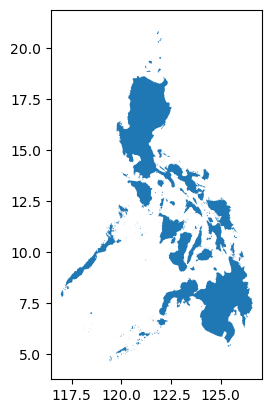

In [153]:
national.plot()

### Dissolve by `region`: Regional Geospatial Data

In [154]:
# Dissolving the geospatial data by region
gadm_regional_dissolved = gadm_region.dissolve(by='region')

print('Shape: '+ str(gadm_regional_dissolved.shape))
gadm_regional_dissolved

Shape: (17, 14)


,geometry,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,province,capital
region,,,,,,,,,,,,,,
BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4...",PHL.9_1,PHL,Philippines,Basilan,NA,NA,Lalawigan,Province,1507,PH.BS,PH-BAS,Basilan,Isabela
CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207...",PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,Abra,Bangued
NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ...",PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,Metropolitan Manila,Manila
Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ...",PHL.34_1,PHL,Philippines,Ilocos Norte,NA,NA,Lalawigan,Province,128,PH.IN,PH-ILN,Ilocos Norte,Laoag
Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ...",PHL.11_1,PHL,Philippines,Batanes,NA,NA,Lalawigan,Province,209,PH.BN,PH-BTN,Batanes,Basco
Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ...",PHL.8_1,PHL,Philippines,Aurora,NA,NA,Lalawigan,Province,377,PH.AU,PH-AUR,Aurora,Baler
Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ...",PHL.12_1,PHL,Philippines,Batangas,NA,NA,Lalawigan,Province,410,PH.BT,PH-BTG,Batangas,Batangas City
Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7...",PHL.45_1,PHL,Philippines,Marinduque,NA,NA,Lalawigan,Province,1740,PH.MQ,PH-MAD,Marinduque,Boac
Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6...",PHL.79_1,PHL,Philippines,Zamboanga del Norte,NA,NA,Lalawigan,Province,972,PH.ZN,PH-ZAN,Zamboanga del Norte,Dipolog


In [155]:
# Only getting the region and geometry data
regional = gadm_regional_dissolved[['geometry']].reset_index()

# Renaming the 'COUNTRY' to 'Geolocation' for merging regional and national geospatial later
regional.rename(columns = {'region':'geolocation'}, inplace = True)

# Check if all Philippine Regions are here
regional     

,geolocation,geometry
0,BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region V,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


<AxesSubplot:>

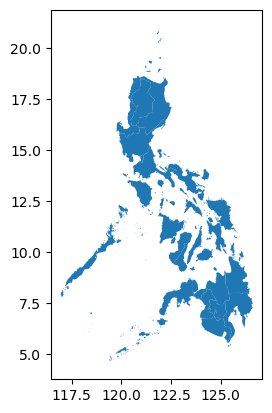

In [156]:
regional.plot()

Since the Philippine regions is complete, let's proceeed to merging the Philippine national and regional geospatial data.

## Merge National and Regional Geospatial Data

In [157]:
gadm_ph = pd.concat([national, regional]).reset_index(drop=True)
gadm_ph

,geolocation,geometry
0,Philippines,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
2,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
3,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
4,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
5,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
6,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
7,Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
8,Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
9,Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."


## Setting Geolocation Naming Format 

In [158]:
geolocation_names = ['PHILIPPINES',
                     'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao',
                     'CAR: Cordillera Administrative Region', 
                     'NCR: National Capital Region', 
                     'Region 1: Ilocos Region',
                     'Region 2: Cagayan Valley', 
                     'Region 3: Central Luzon', 
                     'Region 4A: CALABARZON', 
                     'MIMAROPA: Southwestern Tagalog Region', 
                     'Region 9: Zamboanga Peninsula',
                     'Region 5: Bicol Region', 
                     'Region 6: Western Visayas', 
                     'Region 7: Central Visayas', 
                     'Region 8: Eastern Visayas',  
                     'Region 10: Northern Mindanao', 
                     'Region 11: Davao Region', 
                     'Region 12: SOCCSKSARGEN', 
                     'CARAGA: CARAGA Administrative Region']

gadm_ph['geolocation'] = geolocation_names
gadm_ph.set_index('geolocation')
gadm_ph = gadm_ph.reset_index(drop=True)
gadm_ph

,geolocation,geometry
0,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
2,CAR: Cordillera Administrative Region,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
3,NCR: National Capital Region,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
4,Region 1: Ilocos Region,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
5,Region 2: Cagayan Valley,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
6,Region 3: Central Luzon,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
7,Region 4A: CALABARZON,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
8,MIMAROPA: Southwestern Tagalog Region,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
9,Region 9: Zamboanga Peninsula,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."


In [159]:
# Rechecking the Geolocation of BARMM 
gadm_ph[gadm_ph['geolocation'] == 'BARMM: Bangsamoro Autonomous Region in Muslim ...' ]

,geolocation,geometry


In [160]:
gadm_ph[gadm_ph['geolocation'] =='BARMM: Bangsamoro Autonomous Region in Muslim Mindanao' ]

,geolocation,geometry
1,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."


### Saving the Philippine National and Regional Geospatial Data to GeoJSON

In [161]:
gadm_ph.to_file('data/gadm_ph/gadm_ph.geojson', driver='GeoJSON')

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Merging Philippine SDG and Geospatial Data 

## Loading Datasets and Files


### SDG Data of the Philippines
There are two files that we would need to import through the use of [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for this project. First is the `combined_data.csv`, which holds the information on the progress of the Philippines on the Sustainable Development Goals. Note that this data includes the data per region and for the country (i.e., national data).

In [162]:
sdg_data = pd.read_csv('data/sdg_data/combined_data.csv')
sdg_data.head()

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,Gross Capital Formation,GRDP,Population,Primary Drop-out rate,Primary Drop-out rate (Girls),Primary Drop-out rate (Boys),Secondary Drop-out rate,Secondary Drop-out rate (Girls),Secondary Drop-out rate (Boys),Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,579938180.0,3.697556e+09,76723051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,203930819.0,1.237451e+09,9961971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,13865180.0,9.044601e+07,1369249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,24454284.0,1.289450e+08,4209083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,32773347.0,8.593798e+07,2819641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
sdg_data = sdg_data[['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion Rate (Female)',
       '4.1 JHS Completion Rate (Male)', '4.1 SHS Completion Rate',
       '4.1 SHS Completion Rate (Female)', '4.1 SHS Completion Rate (Male)',
       '4.c TVET trainers trained', '7.1.1 Proportion of pop with electricity',
       '8.1.1 Growth rate of real GDP per capita',
       '10.1.1.1 Income per capita growth rate of bottom 40',
       '10.1.1.2 Income per capita growth rate',
       '14.5.1.1 Coverage of protected areas',
       '14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs',
       '16.1.1 Victims of intentional homicide per 100,000',
       '16.1.s1 Number of murder cases']]
sdg_data.to_csv (f'./data/sdg_data/updated_sdg_data.csv', index = False) # saves to CSV
sdg_data.head() 

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,PHILIPPINES,2000,NaN,96.77,97.28,96.27,66.06,69.49,62.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Geospatial Data of the Philippines

<>

In [164]:
ph_geo_data = gpd.read_file('data/gadm_ph/gadm_ph.geojson', driver='GeoJSON')
ph_geo_data

,geolocation,geometry
0,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
2,CAR: Cordillera Administrative Region,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
3,NCR: National Capital Region,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
4,Region 1: Ilocos Region,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
5,Region 2: Cagayan Valley,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
6,Region 3: Central Luzon,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
7,Region 4A: CALABARZON,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
8,MIMAROPA: Southwestern Tagalog Region,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
9,Region 9: Zamboanga Peninsula,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."


## Data Preprocessing and Cleaning

### Checking the Geolocation format of both SDG and Geospatial Data

In [165]:
sdg_data['Geolocation'].unique()

array(['PHILIPPINES', 'NCR: National Capital Region',
       'CAR: Cordillera Administrative Region', 'Region 1: Ilocos Region',
       'Region 2: Cagayan Valley', 'Region 3: Central Luzon',
       'Region 4A: CALABARZON', 'MIMAROPA: Southwestern Tagalog Region',
       'Region 5: Bicol Region', 'Region 6: Western Visayas',
       'Region 7: Central Visayas', 'Region 8: Eastern Visayas',
       'Region 9: Zamboanga Peninsula', 'Region 10: Northern Mindanao',
       'Region 11: Davao Region', 'Region 12: SOCCSKSARGEN',
       'CARAGA: CARAGA Administrative Region',
       'BARMM: Bangsamoro Autonomous Region in Muslim Mindanao'],
      dtype=object)

In [166]:
ph_geo_data['geolocation']

0                                           PHILIPPINES
1     BARMM: Bangsamoro Autonomous Region in Muslim ...
2                 CAR: Cordillera Administrative Region
3                          NCR: National Capital Region
4                               Region 1: Ilocos Region
5                              Region 2: Cagayan Valley
6                               Region 3: Central Luzon
7                                 Region 4A: CALABARZON
8                 MIMAROPA: Southwestern Tagalog Region
9                         Region 9: Zamboanga Peninsula
10                               Region 5: Bicol Region
11                            Region 6: Western Visayas
12                            Region 7: Central Visayas
13                            Region 8: Eastern Visayas
14                         Region 10: Northern Mindanao
15                              Region 11: Davao Region
16                              Region 12: SOCCSKSARGEN
17                 CARAGA: CARAGA Administrative

### Separating the National and Regional SDG Data 

#### National SDG Data

In [167]:
national_sdg_data = sdg_data[sdg_data['Geolocation'] == 'PHILIPPINES'].reset_index(drop=True)

national_sdg_data.to_csv (f'./data/sdg_data/national_sdg_data.csv', index = False) # saves to CSV

national_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,NaN,NaN,NaN,1.007914,NaN,NaN,NaN,NaN,NaN,NaN
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,NaN,NaN,NaN,1.691458,NaN,NaN,NaN,NaN,NaN,NaN
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,NaN,NaN,NaN,3.064526,NaN,NaN,NaN,NaN,NaN,NaN
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,NaN,NaN,NaN,4.541527,NaN,NaN,NaN,NaN,NaN,NaN
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,NaN,NaN,NaN,2.978552,NaN,NaN,NaN,NaN,NaN,NaN
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,NaN,NaN,NaN,3.372089,NaN,NaN,NaN,NaN,NaN,NaN
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,NaN,NaN,NaN,4.578884,NaN,NaN,NaN,NaN,NaN,NaN
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,NaN,NaN,NaN,2.463484,NaN,NaN,NaN,NaN,NaN,NaN
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,NaN,NaN,99.390000,-0.352027,NaN,NaN,NaN,NaN,NaN,NaN


#### Regional SDG Data

In [168]:
regional_sdg_data = sdg_data[sdg_data['Geolocation'] != 'PHILIPPINES'].reset_index(drop=True)

regional_sdg_data.to_csv (f'data/sdg_data/regional_sdg_data.csv', index = False) # saves to CSV

regional_sdg_data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Separating the National and Regional Geospatial Data 

#### National Geospatial Data

In [169]:
national_geo_data = gadm_ph[gadm_ph['geolocation'] == 'PHILIPPINES'].reset_index(drop=True)

national_geo_data.to_file('data/gadm_ph/gadm_national.geojson', driver='GeoJSON')

national_geo_data

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,geolocation,geometry
0,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


#### Regional Geospatial Data

In [170]:
regional_geo_data = gadm_ph[gadm_ph['geolocation'] != 'PHILIPPINES'].reset_index(drop=True)

regional_geo_data.to_file('data/gadm_ph/gadm_regional.geojson', driver='GeoJSON')

regional_geo_data

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,geolocation,geometry
0,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR: Cordillera Administrative Region,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR: National Capital Region,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region 1: Ilocos Region,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region 2: Cagayan Valley,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region 3: Central Luzon,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region 4A: CALABARZON,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,MIMAROPA: Southwestern Tagalog Region,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region 9: Zamboanga Peninsula,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region 5: Bicol Region,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


## Combining Philippine SDG and Geospatial 

### National Data

#### Fixing the National Geospatial DataFrame for Merging of Datasets

In [171]:
# Now, let's duplicate the regions 22 times to so each data in the SDG dataset will have the geometry of its respective region
final_national_geo_data = pd.DataFrame ()

for i in range (23):
    final_national_geo_data = final_national_geo_data.append (national_geo_data)
    
final_national_geo_data = final_national_geo_data.reset_index (drop = True)
final_national_geo_data

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/2623775538.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_national_geo_data = final_national_geo_data.append (national_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/2623775538.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_national_geo_data = final_national_geo_data.append (national_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/2623775538.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_national_geo_data = final_national_geo_data.append (national_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/2623775538.py:5: FutureWarning: The frame.append method i

,geolocation,geometry
0,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
2,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
3,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
4,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
5,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
6,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
7,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
8,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
9,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


#### Combining the Fixed National Geospatial and SDG Data

Now, since both the geospatial and SDG data have the same number of rows, we can combine the two datasets using the [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function.

In [172]:
national_combined_df = pd.concat ([national_sdg_data, final_national_geo_data], axis = 1)
national_combined_df

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geolocation,geometry
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,NaN,1.007914,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,NaN,1.691458,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,NaN,3.064526,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,NaN,4.541527,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,NaN,2.978552,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,NaN,3.372089,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,NaN,4.578884,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,NaN,2.463484,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,99.390000,-0.352027,NaN,NaN,NaN,NaN,NaN,NaN,PHILIPPINES,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


To ensure that we combined the datasets correctly based on the region, we will be looking at the `Geolocation` and the `geolocation` columns, which are the columns from the two datasets that holds the region names.

In [173]:
national_combined_df [['Geolocation', 'geolocation']].head(20)

,Geolocation,geolocation
0,PHILIPPINES,PHILIPPINES
1,PHILIPPINES,PHILIPPINES
2,PHILIPPINES,PHILIPPINES
3,PHILIPPINES,PHILIPPINES
4,PHILIPPINES,PHILIPPINES
5,PHILIPPINES,PHILIPPINES
6,PHILIPPINES,PHILIPPINES
7,PHILIPPINES,PHILIPPINES
8,PHILIPPINES,PHILIPPINES
9,PHILIPPINES,PHILIPPINES


#### Removing unnecessary columns
We can see that the region names for the two columns refer to the same region. Since these two columns holds the same data, we can remove the `geolocation` column.

In [174]:
final_columns = national_combined_df.columns [: 38].append (national_combined_df.columns [39:])
final_columns

Index(['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion

#### Final National Data

Now, we will only get these columns in the combined DataFrame.

In [175]:
national_combined_df = national_combined_df[final_columns]
national_combined_df

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geometry
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,NaN,NaN,1.007914,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,NaN,NaN,1.691458,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,NaN,NaN,3.064526,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,NaN,NaN,4.541527,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,NaN,NaN,2.978552,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,NaN,NaN,3.372089,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,NaN,NaN,4.578884,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,NaN,NaN,2.463484,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,NaN,99.390000,-0.352027,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


### Regional Data

#### Fixing the Regional Geospatial DataFrame for Merging of Datasets

Now that we have separated the regional and national data, we can now focus on the merging of the SDG and the Geospatial datasets. From the previous exploration, we know that the regions are named and arranged differently. 

To easily merge the datasets, let us rearrange the regions on the geospatial dataset to have the same arrangement and format as the regions on the regional SDG dataset.

In [176]:
# Viewing the current order of regions in regional geospatial data
regional_geo_data

,geolocation,geometry
0,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR: Cordillera Administrative Region,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR: National Capital Region,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region 1: Ilocos Region,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region 2: Cagayan Valley,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region 3: Central Luzon,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region 4A: CALABARZON,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,MIMAROPA: Southwestern Tagalog Region,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region 9: Zamboanga Peninsula,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region 5: Bicol Region,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


In [177]:
# Viewing the order of regions in regional SDG data. 
regional_sdg_data.head(17)

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.1 SHS Completion Rate (Male),4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Region 4A: CALABARZON,2000,NaN,98.50,99.04,97.98,71.03,74.24,67.88,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MIMAROPA: Southwestern Tagalog Region,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Region 5: Bicol Region,2000,NaN,95.56,95.31,95.80,62.05,67.88,56.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Region 6: Western Visayas,2000,NaN,96.16,96.03,96.28,59.47,62.63,56.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Region 7: Central Visayas,2000,NaN,98.60,99.99,97.17,67.18,74.84,60.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# From the order in SDG data, we will be rearranging the order of regions in the regional geospatial data
regional_geo_data = pd.DataFrame().append (
    regional_geo_data.loc [2]
).append (
    regional_geo_data.loc [1]
).append (
    regional_geo_data.loc [3 : 7]
).append (
    regional_geo_data.loc [9 : 12]
).append(
    regional_geo_data.loc [8]
).append(
    regional_geo_data.loc [13 : 15]
).append(
    regional_geo_data.loc[16]
).append(
    regional_geo_data.loc[0]
).reset_index (drop = True)

regional_geo_data

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1468305866.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame().append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1468305866.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame().append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1468305866.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_geo_data = pd.DataFrame().append (
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1468305866.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regi

,geolocation,geometry
0,NCR: National Capital Region,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,(POLYGON ((119.86672200000032 15.8136799999999...
3,Region 2: Cagayan Valley,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,(POLYGON ((120.08513600100014 14.7522300000001...
5,Region 4A: CALABARZON,(POLYGON ((121.09694671600005 13.5386104600000...
6,MIMAROPA: Southwestern Tagalog Region,(POLYGON ((117.31028000100002 7.50721999900008...
7,Region 5: Bicol Region,(POLYGON ((122.98555800100007 11.7136100010001...
8,Region 6: Western Visayas,(POLYGON ((122.3672640010002 9.827860001000033...
9,Region 7: Central Visayas,(POLYGON ((123.2749481200002 9.078849793000188...


With this, the geospatial dataset's regions has the same arrangement as the regional SDG data. 

Although, before combining the datasets, we will need to drop the columns that are all **NaN** values first using the [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [179]:
regional_geo_data = regional_geo_data.dropna (axis = 1)
regional_geo_data

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,geolocation,geometry
0,NCR: National Capital Region,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,(POLYGON ((119.86672200000032 15.8136799999999...
3,Region 2: Cagayan Valley,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,(POLYGON ((120.08513600100014 14.7522300000001...
5,Region 4A: CALABARZON,(POLYGON ((121.09694671600005 13.5386104600000...
6,MIMAROPA: Southwestern Tagalog Region,(POLYGON ((117.31028000100002 7.50721999900008...
7,Region 5: Bicol Region,(POLYGON ((122.98555800100007 11.7136100010001...
8,Region 6: Western Visayas,(POLYGON ((122.3672640010002 9.827860001000033...
9,Region 7: Central Visayas,(POLYGON ((123.2749481200002 9.078849793000188...


In [180]:
# Now, let's duplicate the regions 22 times to so each data in the SDG dataset will have the geometry of its respective region
final_regional_geo_data = pd.DataFrame ()

for i in range (23):
    final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
    
final_regional_geo_data = final_regional_geo_data.reset_index (drop = True)
final_regional_geo_data

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1375537001.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1375537001.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1375537001.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_regional_geo_data = final_regional_geo_data.append (regional_geo_data)
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/1375537001.py:5: FutureWarning: The frame.append method i

,geolocation,geometry
0,NCR: National Capital Region,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,(POLYGON ((119.86672200000032 15.8136799999999...
3,Region 2: Cagayan Valley,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...
386,Region 10: Northern Mindanao,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region 11: Davao Region,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region 12: SOCCSKSARGEN,POLYGON ((125.32145690800019 5.569099903999984...
389,CARAGA: CARAGA Administrative Region,(POLYGON ((125.23621368400029 8.78464985000016...


#### Combining the Fixed Regional Geospatial and SDG Data

Now, since both the geospatial and SDG data have the same number of rows, we can combine the two datasets using the [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function.

In [181]:
regional_combined_df = pd.concat ([regional_sdg_data, final_regional_geo_data], axis = 1)
regional_combined_df

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geolocation,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR: National Capital Region,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAR: Cordillera Administrative Region,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 1: Ilocos Region,(POLYGON ((119.86672200000032 15.8136799999999...
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 2: Cagayan Valley,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 3: Central Luzon,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 10: Northern Mindanao,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 11: Davao Region,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Region 12: SOCCSKSARGEN,POLYGON ((125.32145690800019 5.569099903999984...
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARAGA: CARAGA Administrative Region,(POLYGON ((125.23621368400029 8.78464985000016...


To ensure that we combined the datasets correctly based on the region, we will be looking at the `Geolocation` and the `geolocation` columns, which are the columns from the two datasets that holds the region names.

In [182]:
regional_combined_df [['Geolocation', 'geolocation']].head(20)

,Geolocation,geolocation
0,NCR: National Capital Region,NCR: National Capital Region
1,CAR: Cordillera Administrative Region,CAR: Cordillera Administrative Region
2,Region 1: Ilocos Region,Region 1: Ilocos Region
3,Region 2: Cagayan Valley,Region 2: Cagayan Valley
4,Region 3: Central Luzon,Region 3: Central Luzon
5,Region 4A: CALABARZON,Region 4A: CALABARZON
6,MIMAROPA: Southwestern Tagalog Region,MIMAROPA: Southwestern Tagalog Region
7,Region 5: Bicol Region,Region 5: Bicol Region
8,Region 6: Western Visayas,Region 6: Western Visayas
9,Region 7: Central Visayas,Region 7: Central Visayas


#### Removing unnecessary columns
We can see that the region names for the two columns refer to the same region. Since these two columns holds the same data, we can remove the `geolocation` column.

In [183]:
final_columns = regional_combined_df.columns [: 38].append (regional_combined_df.columns [39:])
final_columns

Index(['Geolocation', 'Year', '1.2.1 Poverty Proportion',
       '1.4.1 Net Elem Enrolment Rate',
       '1.4.1 Net Elem Enrolment Rate (Girls)',
       '1.4.1 Net Elem Enrolment Rate (Boys)', '1.4.1 Net JHS Enrolment Rate',
       '1.4.1 Net JHS Enrolment Rate (Girls)',
       '1.4.1 Net JHS Enrolment Rate (Boys)', '1.4.1 Net SHS Enrolment Rate',
       '1.4.1 Net SHS Enrolment Rate (Girls)',
       '1.4.1 Net SHS Enrolment Rate (Boys)',
       '1.5.4 Proportion of LGU with DRR',
       '3.4.1 Mortality rate credited to NCD',
       '3.4.1 Mortality rate credited to Cardio',
       '3.4.1 Mortality rate credited to Cancer',
       '3.4.1 Mortality rate credited to Diabetes',
       '3.4.1 Mortality rate credited to Respi',
       '3.7.1 Proportion of Contraceptive Use of Women',
       '3.7.2 Teenage pregnancy rates per 1000', '4.1 Elem Completion Rate',
       '4.1 Elem Completion Rate (Female)', '4.1 Elem Completion Rate (Male)',
       '4.1 JHS Completion Rate', '4.1 JHS Completion

#### Final Regional Data

Now, we will only get these columns in the combined DataFrame.

In [184]:
regional_combined_df = regional_combined_df[final_columns]
regional_combined_df

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/Users/

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((120.97872161800012 14.4900665290001...
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((120.6111679080002 16.2046108240001, ..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((119.86672200000032 15.8136799999999...
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((121.19802093500016 15.9080696109999...
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((120.08513600100014 14.7522300000001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((123.77850300000023 8.06634999900012...
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((125.41264343300031 5.36709022600007...
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((125.32145690800019 5.569099903999984...
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(POLYGON ((125.23621368400029 8.78464985000016...


## Converting the National and Regional Pandas DataFrame to GeoPandas DataFrame

Lastly, we would be making a `GeoDataFrame` using the Pandas DataFrame that we have created.

### National GeoDataFrame

In [185]:
national_gdf = gpd.GeoDataFrame(national_combined_df, geometry = national_combined_df ['geometry'])
national_gdf

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geometry
0,PHILIPPINES,2000,NaN,96.7700,97.2800,96.2700,66.0600,69.4900,62.7200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
1,PHILIPPINES,2001,NaN,90.1000,90.9100,89.3300,57.5500,62.2400,52.9600,NaN,...,NaN,NaN,1.007914,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
2,PHILIPPINES,2002,NaN,90.2900,91.1000,89.5100,59.0000,63.7200,54.3900,NaN,...,NaN,NaN,1.691458,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
3,PHILIPPINES,2003,NaN,88.7400,89.6800,87.8400,60.1500,65.0700,55.3400,NaN,...,NaN,NaN,3.064526,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
4,PHILIPPINES,2004,NaN,87.1100,88.0800,86.1700,59.9700,65.0100,55.0400,NaN,...,NaN,NaN,4.541527,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
5,PHILIPPINES,2005,NaN,84.4400,85.3500,83.5600,58.5400,63.5300,53.6500,NaN,...,NaN,NaN,2.978552,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
6,PHILIPPINES,2006,NaN,83.2200,84.0800,82.3900,58.5900,63.4400,53.8500,NaN,...,NaN,NaN,3.372089,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
7,PHILIPPINES,2007,NaN,84.9300,85.8300,84.0700,60.2100,64.8700,55.6500,NaN,...,NaN,NaN,4.578884,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
8,PHILIPPINES,2008,NaN,85.1100,85.7000,84.5500,60.7400,65.1800,56.3900,NaN,...,NaN,NaN,2.463484,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."
9,PHILIPPINES,2009,NaN,89.4800,90.7700,88.2600,59.8900,64.8200,55.1600,NaN,...,NaN,99.390000,-0.352027,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((118.33324 6.07324, 118.33043 6..."


### Regional GeoDataFrame

In [186]:
regional_gdf = gpd.GeoDataFrame(regional_combined_df, geometry = regional_combined_df ['geometry'])
regional_gdf

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net Elem Enrolment Rate (Girls),1.4.1 Net Elem Enrolment Rate (Boys),1.4.1 Net JHS Enrolment Rate,1.4.1 Net JHS Enrolment Rate (Girls),1.4.1 Net JHS Enrolment Rate (Boys),1.4.1 Net SHS Enrolment Rate,...,4.c TVET trainers trained,7.1.1 Proportion of pop with electricity,8.1.1 Growth rate of real GDP per capita,10.1.1.1 Income per capita growth rate of bottom 40,10.1.1.2 Income per capita growth rate,14.5.1.1 Coverage of protected areas,14.5.1.2 Coverage of protected NIPAS and Locally managed MPAs,"16.1.1 Victims of intentional homicide per 100,000",16.1.s1 Number of murder cases,geometry
0,NCR: National Capital Region,2000,NaN,101.00,101.92,100.13,79.05,79.50,78.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
1,CAR: Cordillera Administrative Region,2000,NaN,94.42,94.58,94.26,71.19,76.37,66.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,Region 1: Ilocos Region,2000,NaN,97.73,97.01,98.41,87.51,90.05,85.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
3,Region 2: Cagayan Valley,2000,NaN,95.65,95.74,95.57,77.11,81.11,73.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
4,Region 3: Central Luzon,2000,NaN,98.32,97.85,98.77,74.32,76.58,72.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Region 10: Northern Mindanao,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((123.77850 8.06635, 123.77773 8..."
387,Region 11: Davao Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((125.41264 5.36709, 125.41250 5..."
388,Region 12: SOCCSKSARGEN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.32146 5.56910, 125.32104 5.56910..."
389,CARAGA: CARAGA Administrative Region,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((125.23621 8.78465, 125.24001 8..."


## Saving the data for a single loading in the Plotly Dash application

`geopandas` provides a way to save any changes you've made to the `GeoDataFrame`. You may save it as a Shapefile or a GeoJSON.

### National Data

In [187]:
# shapefile
national_gdf.to_file('./data/national_data.shp')

# geojson
national_gdf.to_file('./data/national_data.geojson', driver='GeoJSON')

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/2907922406.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  national_gdf.to_file('./data/national_data.shp')
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Regional Data

In [188]:
# shapefile
regional_gdf.to_file('./data/regional_data.shp')

# geojson
regional_gdf.to_file('./data/regional_data.geojson', driver='GeoJSON')

/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_9823/693075352.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  regional_gdf.to_file('./data/regional_data.shp')
/Users/ajmarcelo/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
